# Major League Baseball Home Run Analysis

By Trent McNabb and Scott Stimpson

1. What impact do home runs have on a teams win percentage in MLB?
2. What impact do Total Runs and Total Home Runs have on the correlation?
3. How does this effect Home Run to Total Run Ratio have on the correlation between Home Runs and Wins?


In [1]:
#import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Creating data frames for each csv file downloaded from Baseball-Reference.com

In [2]:
#load data
frames = {}

#Create lists to use to pull each file name from the Resources folder
years = ['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010']
stats = ['standings','bat']

#Use nested for loop to load the csv data for standings and batting for each year in its own DataFrame
for year in years:
        for stat in stats:
            file_name = year + '_' + stat + '.csv'
            path = os.path.join('Resources',file_name)
            df = pd.read_csv(path)
            df['Year'] = year
            name = year+ '_' + stat
            frames[name] = df
year = ''
dct = {}
for frame in frames:
    if year == frames[frame].Year.iloc[0]:
        lst.append(frames[frame])
        dct[year]=lst
    else:
        year = frames[frame].Year.iloc[0]
        lst = []
        lst.append(frames[frame])

## What impact do home runs have on wins between 2010 and 2019?

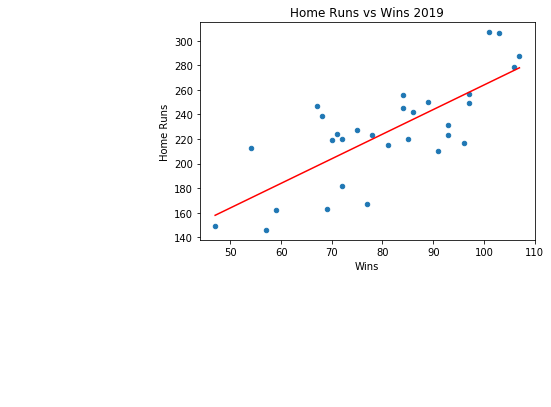

['2019', 0.7636560392783821, 23467, 6776, 0.28874589849576]
2019
Correlation between wins and homeruns: 0.764
Total Runs: 23467
Home Runs: 6776
HR to total run ratio:0.289


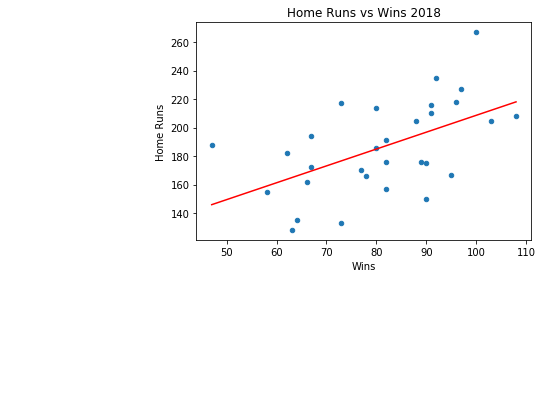

['2018', 0.5406221076840924, 21630, 5585, 0.25820619509939896]
2018
Correlation between wins and homeruns: 0.541
Total Runs: 21630
Home Runs: 5585
HR to total run ratio:0.258


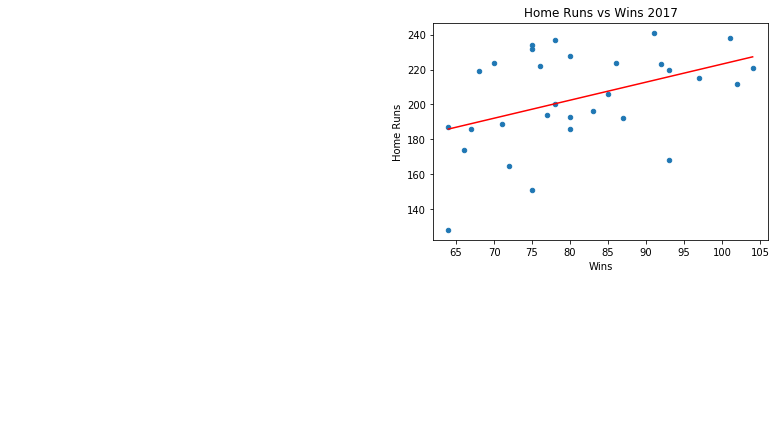

['2017', 0.43008720642812615, 22582, 6105, 0.2703480648303959]
2017
Correlation between wins and homeruns: 0.43
Total Runs: 22582
Home Runs: 6105
HR to total run ratio:0.27


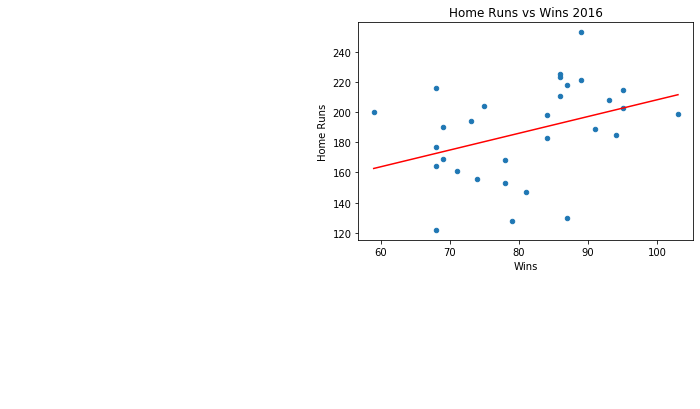

['2016', 0.3712290022454172, 21744, 5610, 0.2580022075055188]
2016
Correlation between wins and homeruns: 0.371
Total Runs: 21744
Home Runs: 5610
HR to total run ratio:0.258


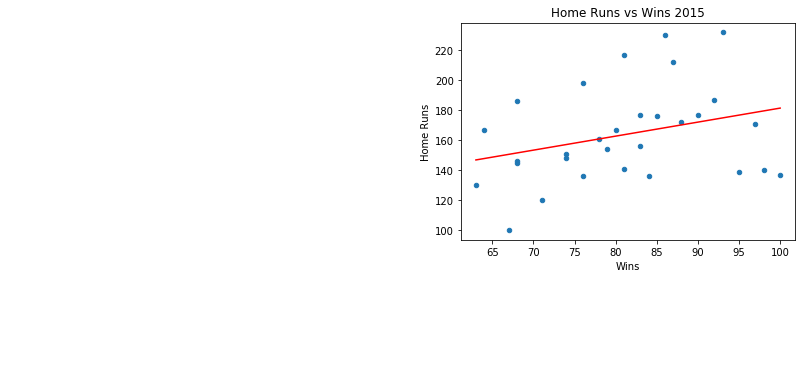

['2015', 0.307407377372572, 20647, 4909, 0.2377585121325132]
2015
Correlation between wins and homeruns: 0.307
Total Runs: 20647
Home Runs: 4909
HR to total run ratio:0.238


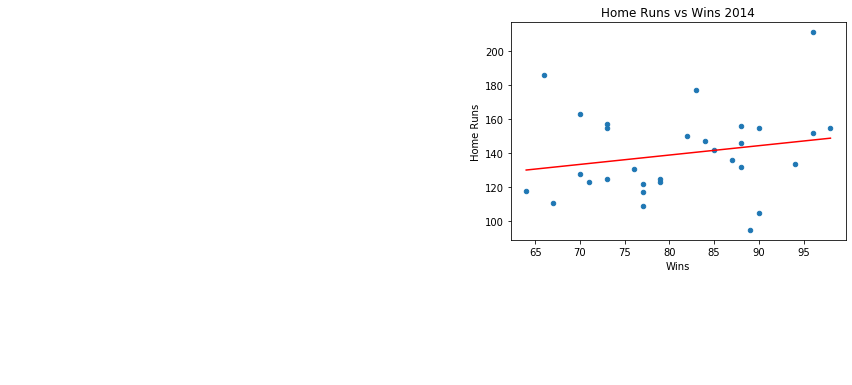

['2014', 0.2097362691515212, 19761, 4186, 0.21183138505136379]
2014
Correlation between wins and homeruns: 0.21
Total Runs: 19761
Home Runs: 4186
HR to total run ratio:0.212


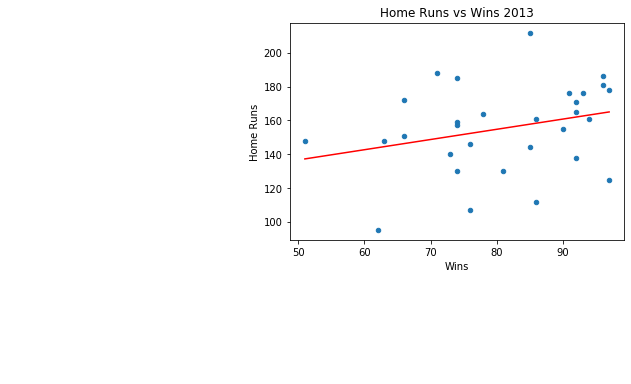

['2013', 0.28327230553522814, 20255, 4661, 0.23011602073562085]
2013
Correlation between wins and homeruns: 0.283
Total Runs: 20255
Home Runs: 4661
HR to total run ratio:0.23


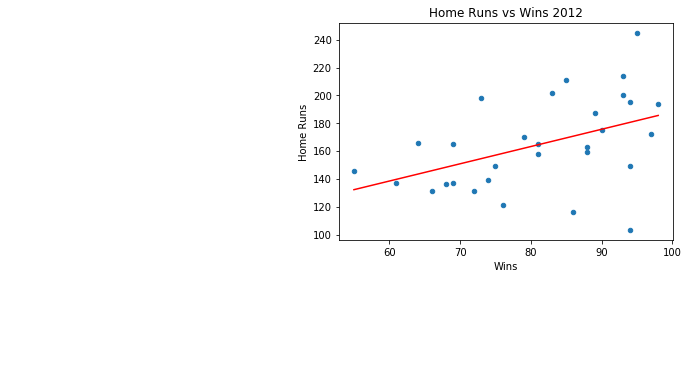

['2012', 0.44884093895910715, 21017, 4934, 0.23476233525241472]
2012
Correlation between wins and homeruns: 0.449
Total Runs: 21017
Home Runs: 4934
HR to total run ratio:0.235


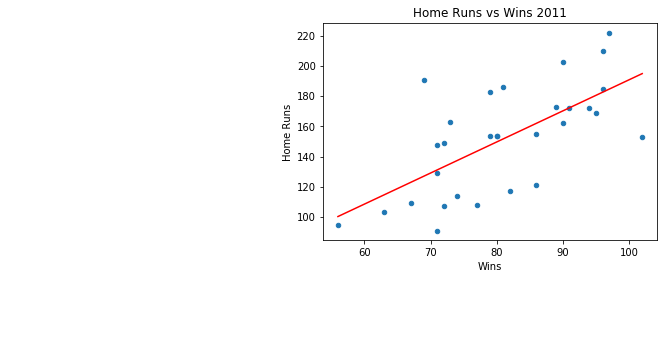

['2011', 0.6606139920230835, 20808, 4552, 0.21876201460976546]
2011
Correlation between wins and homeruns: 0.661
Total Runs: 20808
Home Runs: 4552
HR to total run ratio:0.219


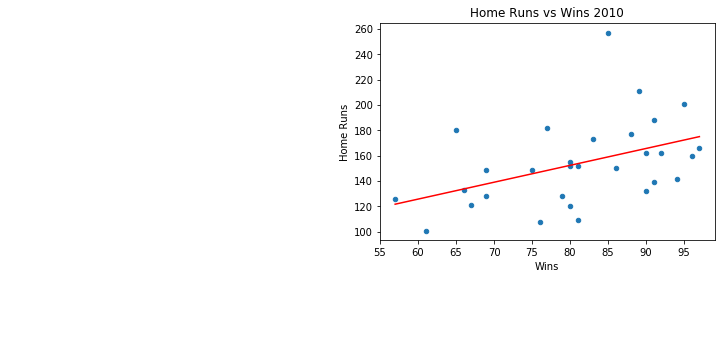

['2010', 0.43779982679772234, 21308, 4613, 0.21649145860709593]
2010
Correlation between wins and homeruns: 0.438
Total Runs: 21308
Home Runs: 4613
HR to total run ratio:0.216


In [3]:
#2010-2019 Analysis and Visualization

sums = []
for year in years:
    
    #Drop empty rows
    stand = dct[year][0].dropna()
    bat = dct[year][1].dropna()
    #Datacleaning
    stand = stand[['Tm','W','L','W-L%','RA','Rdiff']]
    bat=bat.rename(columns={'R':'R_Total'})
    stand_bat= stand.merge(bat, on='Tm',how='inner')
    
    #Create scatter plot and calculate linear regression analysis
    stand_bat.plot.scatter(x = 'W', y = 'HR')
    x_values = stand_bat['W']
    y_values = stand_bat['HR']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    
    #Labeling of the charts
    title = 'Home Runs vs Wins ' + year
    plt.title(title)
    plt.xlabel('Wins')
    plt.ylabel('Home Runs')
    
    #Saving each chart as a png file
    title += '.png'
    title = os.path.join('Resources',title)
    plt.savefig(title)
    
    plt.show()
    

    corr_co = stand_bat.W.corr(stand_bat.HR)
    total_runs = stand_bat.R_Total.sum()
    total_hr = stand_bat.HR.sum()
    hr_ratio = total_hr/total_runs
    row = [year,corr_co,total_runs,total_hr,hr_ratio]
    sums.append(row)
    print(row)
    print(f'{year}\nCorrelation between wins and homeruns: {round(corr_co,3)}\nTotal Runs: {total_runs}\nHome Runs: {total_hr}\nHR to total run ratio:{round(hr_ratio,3)}')
    

## What impact do Total Runs and Total Home Runs have on the correlation between Home Runs and Wins?

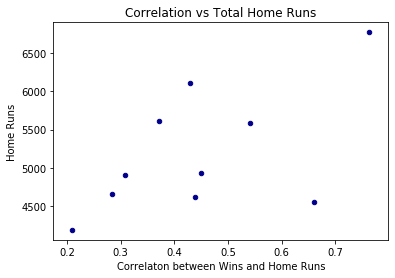

The correlation coefficient is 0.583


In [4]:
#Correlation vs Total Home Runs
cols = ['Year','Corr','R','HR','HR/R']
df = pd.DataFrame(sums,columns=cols)

#Create scatter plot for Correlation vs Total Home Runs
df.plot.scatter(x='Corr',y='HR',c='DarkBlue')

#Label the chart
title = 'Correlation vs Total Home Runs'
plt.title(title)
plt.xlabel('Correlaton between Wins and Home Runs')
plt.ylabel('Home Runs')

#Save chart as png file
title += '.png'
title = os.path.join('Resources',title)
plt.savefig(title)

plt.show()

print(f'The correlation coefficient is {round(df.Corr.corr(df.HR),3)}')


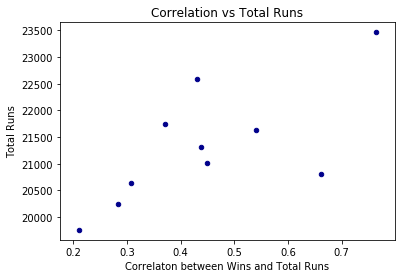

The correlation coefficient is 0.7


In [5]:
#Correlation vs Total Runs
cols = ['Year','Corr','R','HR','HR/R']
df = pd.DataFrame(sums,columns=cols)

#Create the scatter plot
df.plot.scatter(x='Corr',y='R',c='DarkBlue')

#label the chart
title = 'Correlation vs Total Runs'
plt.title(title)
plt.xlabel('Correlaton between Wins and Total Runs')
plt.ylabel('Total Runs')

#save the chart as png file
title += '.png'
title = os.path.join('Resources',title)
plt.savefig(title)

plt.show()
print(f'The correlation coefficient is {round(df.Corr.corr(df.R),3)}')

#  What impact do Home Run to Total Run Ratio have on the correlation between Home Runs and Wins?

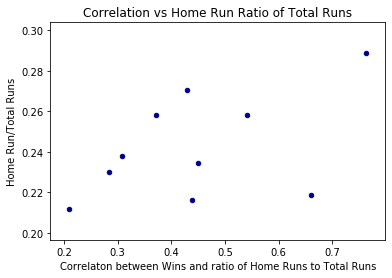

The correlation coefficient is 0.5


In [6]:
#Correlation vs Total Home Runs
cols = ['Year','Corr','R','HR','HR_R']
df = pd.DataFrame(sums,columns=cols)

#Create the scatter plot
df.plot.scatter(x='Corr',y='HR_R',c='DarkBlue')
title = 'Correlation vs Home Run Ratio of Total Runs'

#Label the chart
plt.title(title)
plt.xlabel('Correlaton between Wins and ratio of Home Runs to Total Runs')
plt.ylabel('Home Run/Total Runs')

#save the chart as png file
title += '.png'
title = os.path.join('Resources',title)
plt.savefig(title)

plt.show()
print(f'The correlation coefficient is {round(df.Corr.corr(df.HR_R),3)}')

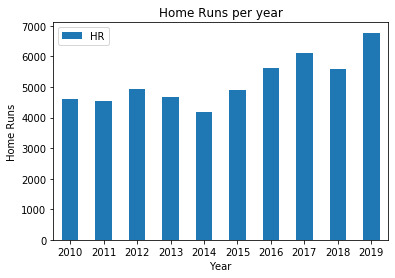

In [7]:
#Home runs by year
cols = ['Year','Corr','R','HR','HR_R']
df = pd.DataFrame(sums,columns=cols)
df.sort_values('Year',ascending=True).plot.bar(x='Year',y='HR',rot=0)
title = 'Home Runs per year'
plt.title(title)
plt.xlabel('Year')
plt.ylabel('Home Runs')
title += '.png'
title = os.path.join('Resources',title)
plt.savefig(title)
plt.show()